In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import math

results = None
with open('../results/large_interpolated.json', 'r') as f:
  results = json.load(f)['results']
flat = [r for env_r in results for r_r in env_r for r in r_r]
df = pd.DataFrame(flat)
df

,None-1-1,None-1-2,None-1-inf,EPIC-1-1,EPIC-1-2,EPIC-1-inf,DARD-1-1,DARD-1-2,DARD-1-inf,None-2-1,...,DARD-0-2,DARD-0-inf,Minimal-1-1,Minimal-1-2,Minimal-1-inf,Minimal-2-1,Minimal-2-2,Minimal-2-inf,regret1,regret2
0,0.000023,0.000011,0.000007,0.000065,0.000011,0.000006,0.000031,0.000010,0.000006,0.000933,...,34.088153,1.911417,0.000866,0.000020,0.000006,0.003244,0.000538,0.000331,0.008493,-0.002836
1,0.000050,0.000023,0.000014,0.000139,0.000023,0.000014,0.000067,0.000021,0.000013,0.002017,...,68.176306,3.822835,0.001038,0.000031,0.000014,0.006940,0.001153,0.000709,0.049292,-0.042566
2,0.000081,0.000036,0.000023,0.000224,0.000036,0.000022,0.000108,0.000034,0.000021,0.003293,...,102.264459,5.734252,0.006984,0.000149,0.000024,0.011203,0.001862,0.001146,0.034920,0.003195
3,0.000117,0.000053,0.000033,0.000324,0.000053,0.000032,0.000157,0.000049,0.000030,0.004813,...,136.352612,7.645669,0.007419,0.000161,0.000034,0.016195,0.002690,0.001655,0.024233,0.011649
4,0.000160,0.000072,0.000044,0.000441,0.000072,0.000044,0.000214,0.000067,0.000041,0.006654,...,170.440765,9.557087,0.007541,0.000172,0.000046,0.022075,0.003668,0.002257,0.005010,-0.005952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,1.331501,0.026249,0.001792,0.071314,0.008421,0.003486,0.244965,0.011004,0.003196,67.885099,...,419.695104,27.024819,0.041476,0.008464,0.003514,5.638339,0.408997,0.166063,0.224811,0.350616
4092,1.371660,0.027035,0.001861,0.102461,0.012038,0.004983,0.367037,0.015098,0.004331,69.935249,...,454.669696,29.276887,0.059187,0.012116,0.005028,9.561818,0.555440,0.220970,0.324622,0.487456
4093,1.405726,0.027700,0.001919,0.163391,0.019030,0.007876,0.579911,0.021617,0.006083,71.664656,...,489.644288,31.528955,0.093729,0.019224,0.007975,17.374796,0.773896,0.294734,0.302543,0.606902
4094,1.434817,0.028267,0.001967,0.333689,0.037935,0.015691,0.980836,0.033257,0.009123,73.136135,...,524.618880,33.781023,0.190903,0.039095,0.016217,32.248517,1.079804,0.373688,0.336152,0.773956


In [13]:
# add regret (average of regret1 and regret2)
df['regret'] = (df['regret1'] + df['regret2']) / 2
df = df.drop(['regret1', 'regret2'], axis=1)
df.head()

,None-1-1,None-1-2,None-1-inf,EPIC-1-1,EPIC-1-2,EPIC-1-inf,DARD-1-1,DARD-1-2,DARD-1-inf,None-2-1,...,DARD-0-1,DARD-0-2,DARD-0-inf,Minimal-1-1,Minimal-1-2,Minimal-1-inf,Minimal-2-1,Minimal-2-2,Minimal-2-inf,regret
0,0.000023,0.000011,0.000007,0.000065,0.000011,0.000006,0.000031,0.000010,0.000006,0.000933,...,1744.313138,34.088153,1.911417,0.000866,0.000020,0.000006,0.003244,0.000538,0.000331,0.002828
1,0.000050,0.000023,0.000014,0.000139,0.000023,0.000014,0.000067,0.000021,0.000013,0.002017,...,3488.626277,68.176306,3.822835,0.001038,0.000031,0.000014,0.006940,0.001153,0.000709,0.003363
2,0.000081,0.000036,0.000023,0.000224,0.000036,0.000022,0.000108,0.000034,0.000021,0.003293,...,5232.939415,102.264459,5.734252,0.006984,0.000149,0.000024,0.011203,0.001862,0.001146,0.019058
3,0.000117,0.000053,0.000033,0.000324,0.000053,0.000032,0.000157,0.000049,0.000030,0.004813,...,6977.252553,136.352612,7.645669,0.007419,0.000161,0.000034,0.016195,0.002690,0.001655,0.017941
4,0.000160,0.000072,0.000044,0.000441,0.000072,0.000044,0.000214,0.000067,0.000041,0.006654,...,8721.565691,170.440765,9.557087,0.007541,0.000172,0.000046,0.022075,0.003668,0.002257,-0.000471


In [14]:
# remove baselines
df = df[[c for c in df.columns if '0' not in c and 'None' not in c]]

In [15]:
# sort by regret value
df = df.sort_values(by='regret')

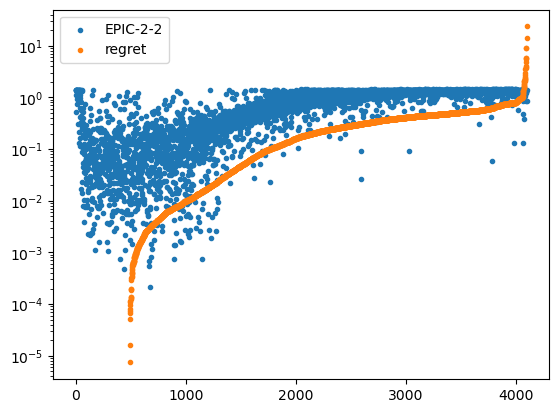

In [16]:
x_axis = np.arange(df.shape[0])
columns = ['EPIC-2-2', 'regret']
for key in columns:
  plt.scatter(x_axis, df[key], label=key, marker='.')
plt.yscale('log')
plt.legend(columns)
plt.show()

In [17]:
corrs = df.corr()
corrs

,EPIC-1-1,EPIC-1-2,EPIC-1-inf,DARD-1-1,DARD-1-2,DARD-1-inf,EPIC-2-1,EPIC-2-2,EPIC-2-inf,DARD-2-1,...,DARD-inf-1,DARD-inf-2,DARD-inf-inf,Minimal-1-1,Minimal-1-2,Minimal-1-inf,Minimal-2-1,Minimal-2-2,Minimal-2-inf,regret
EPIC-1-1,1.000000,0.673008,0.492030,0.984182,0.540544,0.399208,0.885451,0.941061,0.523996,0.886176,...,0.713170,0.720340,0.660627,0.977074,0.578759,0.499219,0.882931,0.941029,0.523886,0.224466
EPIC-1-2,0.673008,1.000000,0.947041,0.762015,0.883422,0.812736,0.292587,0.547992,0.891319,0.302320,...,0.094560,0.109767,0.207164,0.759997,0.963388,0.934087,0.287547,0.547881,0.891320,0.160542
EPIC-1-inf,0.492030,0.947041,1.000000,0.585100,0.871765,0.881685,0.111201,0.366648,0.865281,0.118778,...,-0.058813,-0.044465,0.065890,0.579158,0.917235,0.965504,0.106311,0.366524,0.865409,0.118218
DARD-1-1,0.984182,0.762015,0.585100,1.000000,0.640580,0.493464,0.814374,0.911979,0.617005,0.820543,...,0.630907,0.639576,0.608209,0.984382,0.676671,0.591412,0.811261,0.911933,0.616896,0.228182
DARD-1-2,0.540544,0.883422,0.871765,0.640580,1.000000,0.962010,0.186495,0.417769,0.778067,0.185545,...,0.013846,0.027951,0.123720,0.621332,0.844977,0.843820,0.182232,0.417679,0.778084,0.108774
DARD-1-inf,0.399208,0.812736,0.881685,0.493464,0.962010,1.000000,0.059690,0.287444,0.729950,0.056010,...,-0.082984,-0.068497,0.039466,0.473189,0.773214,0.833116,0.055401,0.287345,0.730095,0.081626
EPIC-2-1,0.885451,0.292587,0.111201,0.814374,0.186495,0.059690,1.000000,0.931790,0.237444,0.997923,...,0.925051,0.924008,0.791393,0.784882,0.170692,0.108027,0.999955,0.931826,0.237297,0.195564
EPIC-2-2,0.941061,0.547992,0.366648,0.911979,0.417769,0.287444,0.931790,1.000000,0.533984,0.936691,...,0.857031,0.866724,0.836625,0.871219,0.407325,0.335061,0.929124,0.999999,0.533834,0.226631
EPIC-2-inf,0.523996,0.891319,0.865281,0.617005,0.778067,0.729950,0.237444,0.533984,1.000000,0.254745,...,0.173714,0.189842,0.345680,0.577753,0.816346,0.803694,0.232433,0.533902,0.999976,0.146317
DARD-2-1,0.886176,0.302320,0.118778,0.820543,0.185545,0.056010,0.997923,0.936691,0.254745,1.000000,...,0.926697,0.925881,0.798530,0.786490,0.180260,0.115605,0.997733,0.936723,0.254591,0.199979


In [18]:
corrs['regret'].sort_values(ascending=False)

regret           1.000000
DARD-1-1         0.228182
DARD-2-2         0.227996
EPIC-2-2         0.226631
Minimal-2-2      0.226621
EPIC-1-1         0.224466
Minimal-1-1      0.215283
DARD-2-1         0.199979
EPIC-2-1         0.195564
Minimal-2-1      0.194441
DARD-inf-inf     0.178768
EPIC-inf-inf     0.170344
DARD-inf-2       0.170098
EPIC-inf-2       0.167006
DARD-inf-1       0.166493
EPIC-inf-1       0.163292
EPIC-1-2         0.160542
DARD-2-inf       0.147360
EPIC-2-inf       0.146317
Minimal-2-inf    0.146191
Minimal-1-2      0.122455
EPIC-1-inf       0.118218
DARD-1-2         0.108774
Minimal-1-inf    0.102366
DARD-1-inf       0.081626
Name: regret, dtype: float64

In [19]:
corrs['EPIC-2-2'].sort_values(ascending=False)

EPIC-2-2         1.000000
Minimal-2-2      0.999999
DARD-2-2         0.999443
EPIC-1-1         0.941061
DARD-2-1         0.936691
EPIC-2-1         0.931790
Minimal-2-1      0.929124
DARD-1-1         0.911979
Minimal-1-1      0.871219
DARD-inf-2       0.866724
EPIC-inf-2       0.862946
DARD-inf-1       0.857031
EPIC-inf-1       0.853194
DARD-inf-inf     0.836625
EPIC-inf-inf     0.824430
EPIC-1-2         0.547992
DARD-2-inf       0.539894
EPIC-2-inf       0.533984
Minimal-2-inf    0.533834
DARD-1-2         0.417769
Minimal-1-2      0.407325
EPIC-1-inf       0.366648
Minimal-1-inf    0.335061
DARD-1-inf       0.287444
regret           0.226631
Name: EPIC-2-2, dtype: float64

In [20]:
df.columns

Index(['EPIC-1-1', 'EPIC-1-2', 'EPIC-1-inf', 'DARD-1-1', 'DARD-1-2',
       'DARD-1-inf', 'EPIC-2-1', 'EPIC-2-2', 'EPIC-2-inf', 'DARD-2-1',
       'DARD-2-2', 'DARD-2-inf', 'EPIC-inf-1', 'EPIC-inf-2', 'EPIC-inf-inf',
       'DARD-inf-1', 'DARD-inf-2', 'DARD-inf-inf', 'Minimal-1-1',
       'Minimal-1-2', 'Minimal-1-inf', 'Minimal-2-1', 'Minimal-2-2',
       'Minimal-2-inf', 'regret'],
      dtype='object')

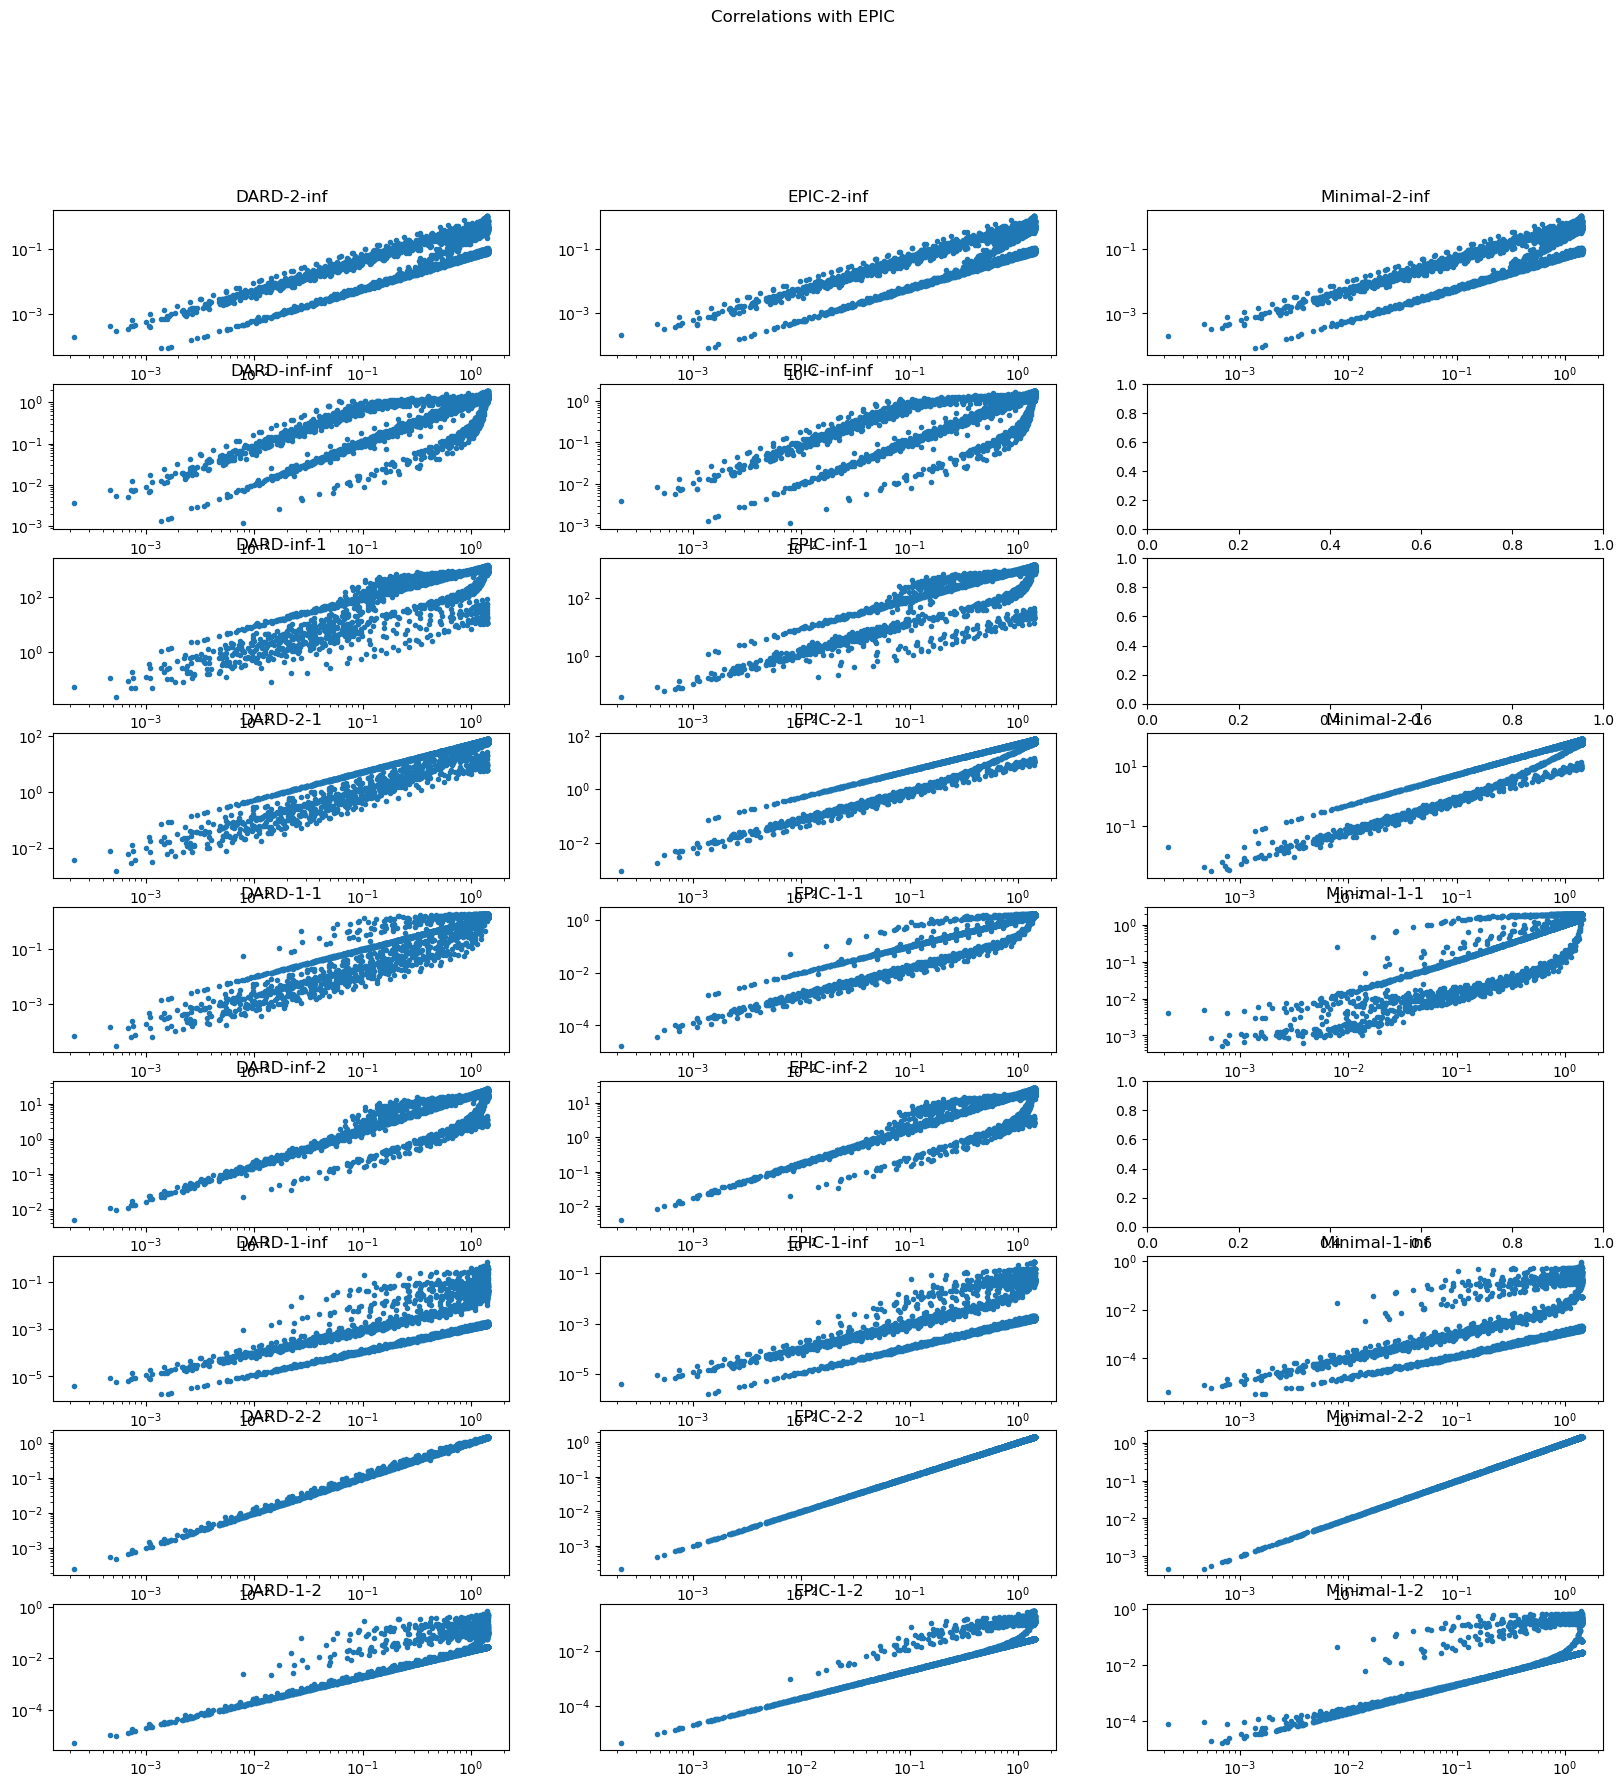

In [21]:
canons = set([col.split('-')[0] for col in df.columns if col != 'regret'])
norms = set(['-'.join(col.split('-')[1:]) for col in df.columns if col != 'regret'])
fig, ax = plt.subplots(ncols=len(canons), nrows=len(norms), figsize=(20, 20))
for i, canon in enumerate(canons):
  for j, norm in enumerate(norms):
    key = canon + '-' + norm
    if key not in df.columns:
      continue
    ax[j][i].scatter(df['EPIC-2-2'], df[key], label=key, marker='.')
    ax[j][i].set_title(key)
    ax[j][i].set_xscale('log')
    ax[j][i].set_yscale('log')

fig.suptitle('Correlations with EPIC')

plt.show()